# Supersampling

The photometric datapoints we're dealing with are always integrations over time. If the exposure time is long, such as with *Kepler* long cadence data, the light curve features are smeared, and we need to include the effect from the long exposure time into the light curve model. This can be done easily by supersampling the model (that is, calculating the model for several time samples inside each exposure and averaging the results).  

*PyTransit* implements a basic supersampler in `pytransit.supersampler.SuperSampler` to facilitate transit model supersampling. You don't generally need to initialize or call the supersampler manually, since the transit model uses it automatically, but knowing how to use it may come handy in some more advanced situations.

`SuperSampler` is initialized as `SuperSampler(nsamples, exptime)`, where `nsamples` is the number of subsamples to create per exposure, and `exptime` is the exposure duration.

In [28]:
%pylab inline
from pytransit.supersampler import SuperSampler

Populating the interactive namespace from numpy and matplotlib


In [29]:
sampler = SuperSampler(nsamples=5, exptime=1)

The subsample positions are calculated as
$$s_i = t + \mathbf{s} \times t_e$$
where $\mathbf{s}$ are the subsample positions normalized to [-0.5, 0.5], and can be accessed from the sampler

In [30]:
sampler.sample_positions

array([-0.4, -0.2,  0. ,  0.2,  0.4])

After the initialization, the `SuperSampler` offers two methods 

 - `sample(times[npt])` $\rightarrow$ `array[nsamples*npt]`
 - `average(flux[nsamples*npt])` $\rightarrow$ `array[npt]`
 
Sample is used to create a set of supersampled time stamps where `times` is an 1D array storing the exposure center times and `expdur` is the exposure duration. After the model has been evaluated for the supersampled time stamps, `average` is used to compute the per-exposure averaged model.

In [31]:
time_o = arange(0,3).astype('d')
time_s = sampler.sample(time_o)

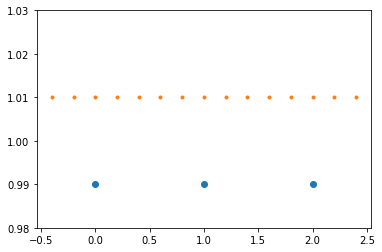

In [34]:
plot(time_o, full_like(time_o, 0.99), 'o')
plot(time_s, full_like(time_s, 1.01), '.')
ylim(0.98,1.03);

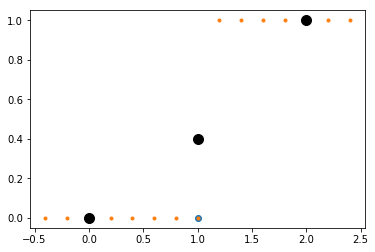

In [56]:
def lcfun(time):
    return (time > 1.1).astype('d')

plot(time_o, lcfun(time_o), 'o')
plot(time_s, lcfun(time_s), '.')
plot(time_o, sampler.average(lcfun(time_s)), 'ko', ms=10)

---

<center> &copy; 2017 Hannu Parviainen </center>